In [1]:
# Note the followings are important data manipulation packages
# Import Python packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sns
import sklearn
import tensorflow as tf

## Download the dataset


In [2]:
# connect to Google Drive and import the two relevant data files in CSV (comma-separated values) format.
#from IPython.display import clear_output
import zipfile
from pathlib import Path

#GET DATA SET FROM GOOGLE DRIVE
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/file/d/1GThRqLRy1Dl55pIM6RESTX51yXjnvSFE/view?usp=sharing' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1GThRqLRy1Dl55pIM6RESTX51yXjnvSFE" -O 'arvin6-medical-records-10-yrs.zip' && rm -rf /tmp/cookies.txt

with zipfile.ZipFile('arvin6-medical-records-10-yrs.zip', 'r') as zip_ref:
    zip_ref.extractall('string workshop')

# The dataset is on Google drive as a zip file. When we run the cell this zip file is unzipped it into your Google Colab environment.

# Take a look at the dataset structure by pressing the folder icon on the left sidebar.

dataset_folder = Path("/content/string workshop/arvin6-medical-records-10-yrs") 

# Your output should contain **encounter.csv** and **encounter_dx.csv**:
print(list(dataset_folder.glob("*.*")))

--2023-03-30 21:22:33--  https://docs.google.com/uc?export=download&confirm=&id=1GThRqLRy1Dl55pIM6RESTX51yXjnvSFE
Resolving docs.google.com (docs.google.com)... 173.194.203.138, 173.194.203.113, 173.194.203.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.203.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-9c-docs.googleusercontent.com/docs/securesc/d84h9v1kc73smgsa517n53eefot79iq7/dtppbmnkk6bfd9e5pouggskmlp67363i/1680211350000/14757718682151807649/14848691965320462612Z/1GThRqLRy1Dl55pIM6RESTX51yXjnvSFE?e=download&uuid=4e945031-7639-454e-95bf-16d5e3419a88 [following]
--2023-03-30 21:22:35--  https://doc-14-9c-docs.googleusercontent.com/docs/securesc/d84h9v1kc73smgsa517n53eefot79iq7/dtppbmnkk6bfd9e5pouggskmlp67363i/1680211350000/14757718682151807649/14848691965320462612Z/1GThRqLRy1Dl55pIM6RESTX51yXjnvSFE?e=download&uuid=4e945031-7639-454e-95bf-16d5e3419a88
Resolving doc-14-9c-docs.googleusercontent.com (doc-14-9c-docs

In [3]:
# Transform the datasets into a Pandas dataframe object
encounter_csv = dataset_folder / "encounter.csv"
encounter_dx_csv = dataset_folder / "encounter_dx.csv"
df_encounter = pd.read_csv(encounter_csv)
df_encounter_dx = pd.read_csv(encounter_dx_csv)

In [4]:
#Two CSV files loaded are: 
#encounter.csv:  This table contains records representing each patient's encounter with the healthcare system. 
#       We need the "SOAP_Note" 
# encounter_dx.csv:  This table contains the corresponding diagnosis for encounters involving a 
#     clinial assessment.  We need the "description" column which is the patient diagnosis that we will try to predict.

# Number of records in the df_encounter dataframe
print(f"Number of records: {len(df_encounter)}")

# Recall that df_encounter contains the encounter.csv: 
# This table contains records representing each patient's encounter with the healthcare system. 
# This includes clinic assessments, pharmacy visits, and lab orders. We will focus specifically on the "SOAP_Note" column.

# Look at the first 5 rows in the dataframe using the head() method
df_encounter.head()

Number of records: 5447


,Provider_Org,Encounter_ID,Member_ID,Provider_ID,Provider_NPI,Clinic_ID,Encounter_DateTime,Encounter_Description,CC,Episode_ID,...,medication_orders_count,medication_fulfillment_count,vital_sign_count,therapy_orders_count,therapy_actions_count,immunization_count,Has_Appt,SOAP_Note,consult_ordered,Disposition
0,ExactData Medical Health System,L8694502508698944760,568001602-01,663746638,2531462832,Sidney Hillman Health Center,2005-06-30T19:15:00Z,Lacy visited primary care physician on 6/30/20...,mild occasional lightheadedness,L8694502508698944760,...,1,0,7,0,1,0,True,s:a 33 year old female crystallographer presen...,NaN,ReleasedWithoutLimitations
1,ExactData Medical Health System,V3046573432409333612,568001602-01,523808810,1380097962,Corner Drug Store,2005-07-01T23:44:00Z,Lacy visited pharmacy on 7/1/2005 6:44:00 PM f...,NaN,L8694502508698944760,...,0,1,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations
2,ExactData Medical Health System,X3228783097331248888,568001602-01,695700114,1261075194,Wood Diagnostic Labs,2005-07-05T14:54:00Z,Lacy visited medical lab on 7/5/2005 9:54:00 A...,NaN,L8694502508698944760,...,0,0,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations
3,ExactData Medical Health System,M3204724885018391695,568001602-01,663746638,2531462832,Sidney Hillman Health Center,2005-10-07T15:45:00Z,Lacy visited primary care physician on 10/7/20...,NaN,M3204724885018391695,...,0,0,7,0,1,1,True,s:33 yr old female crystallographer presents t...,NaN,ReleasedWithoutLimitations
4,ExactData Medical Health System,G7012345417035113309,568001602-01,695700114,1261075194,Wood Diagnostic Labs,2005-10-12T20:33:00Z,Lacy visited medical lab on 10/12/2005 3:33:00...,NaN,M3204724885018391695,...,0,0,0,0,0,0,False,NaN,NaN,ReleasedWithoutLimitations


In [5]:
# Print the number of records in the df_encounter_dx dataframe
print(f"Number of records: {len(df_encounter_dx)}")

# Recall that df_encounter_dx contains the encounter_dx.csv: 
# This table contains the corresponding diagnosis for encounters involving a clinial assessment. 
# From this table, we will focus on the "description" column which is the patient diagnosis that we will try to predict.

# Look at the first 5 rows in the dataframe using the head() method
df_encounter_dx.head()

Number of records: 3063


,Provider_Org,code,vocab,description,severity,Encounter_ID
0,ExactData Medical Health System,401.9,ICD9,Hypertension,mild,L8694502508698944760
1,ExactData Medical Health System,V70.0,ICD9,General medical examination,NaN,M3204724885018391695
2,ExactData Medical Health System,496,ICD9,Chronic Obstructive Pulmonary Disease,critical,C2819614934032019919
3,ExactData Medical Health System,401.9,ICD9,Hypertension,mild,S4571692645992867370
4,ExactData Medical Health System,V70.0,ICD9,General medical examination,NaN,J6262874375300991101


## Merge tables using Pandas

Currently, the information we need is in two separate dataframes.  In order to combine the information into a single dataframe, we will use the Pandas Python package to merge the tables and then select the relevant rows and columns. 

Use the *merge* method in Pandas to combine the df_encounter and df_encounter_dx dataframes.  The "on" parameter specifies the *key* to match the records in each dataframe to each other.  In this case, we will be using the "Encounter_ID" as the key to connect the records in the two dataframes.

In [6]:
# Merge the df_encounter and df_encounter_dx dataframes
df_merged = pd.merge(df_encounter, df_encounter_dx, on="Encounter_ID")
df_merged.head()

,Provider_Org_x,Encounter_ID,Member_ID,Provider_ID,Provider_NPI,Clinic_ID,Encounter_DateTime,Encounter_Description,CC,Episode_ID,...,immunization_count,Has_Appt,SOAP_Note,consult_ordered,Disposition,Provider_Org_y,code,vocab,description,severity
0,ExactData Medical Health System,L8694502508698944760,568001602-01,663746638,2531462832,Sidney Hillman Health Center,2005-06-30T19:15:00Z,Lacy visited primary care physician on 6/30/20...,mild occasional lightheadedness,L8694502508698944760,...,0,True,s:a 33 year old female crystallographer presen...,NaN,ReleasedWithoutLimitations,ExactData Medical Health System,401.9,ICD9,Hypertension,mild
1,ExactData Medical Health System,M3204724885018391695,568001602-01,663746638,2531462832,Sidney Hillman Health Center,2005-10-07T15:45:00Z,Lacy visited primary care physician on 10/7/20...,NaN,M3204724885018391695,...,1,True,s:33 yr old female crystallographer presents t...,NaN,ReleasedWithoutLimitations,ExactData Medical Health System,V70.0,ICD9,General medical examination,NaN
2,ExactData Medical Health System,C2819614934032019919,937650000-01,581395544,2463742680,Family Health,2005-03-12T04:07:00Z,Alexa visited emergency clinic on 3/11/2005 11...,critical dyspnea,C2819614934032019919,...,0,True,s:a 32 year old f presents with critical dyspn...,NaN,ReleasedWithoutLimitations,ExactData Medical Health System,496,ICD9,Chronic Obstructive Pulmonary Disease,critical
3,ExactData Medical Health System,S4571692645992867370,937650000-01,135055397,1032122911,Advocate Medical Group,2005-04-19T15:00:00Z,Alexa visited primary care physician on 4/19/2...,mild spells of vertigo,S4571692645992867370,...,0,True,s:a white female aged 32 Ys presents with 8 mo...,NaN,ReleasedWithoutLimitations,ExactData Medical Health System,401.9,ICD9,Hypertension,mild
4,ExactData Medical Health System,J6262874375300991101,937650000-01,135055397,1032122911,Advocate Medical Group,2005-10-20T18:30:00Z,Alexa visited primary care physician on 10/20/...,NaN,J6262874375300991101,...,1,True,s:32 yr old white F presents today for routine...,NaN,ReleasedWithoutLimitations,ExactData Medical Health System,V70.0,ICD9,General medical examination,NaN


In [8]:
# Look at the available columns
df_merged.columns

Index(['Provider_Org_x', 'Encounter_ID', 'Member_ID', 'Provider_ID',
       'Provider_NPI', 'Clinic_ID', 'Encounter_DateTime',
       'Encounter_Description', 'CC', 'Episode_ID', 'Patient_DOB',
       'Patient_Gender', 'Facility_Name', 'Provider_Name', 'Specialty',
       'Clinic_Type', 'lab_orders_count', 'lab_results_count',
       'medication_orders_count', 'medication_fulfillment_count',
       'vital_sign_count', 'therapy_orders_count', 'therapy_actions_count',
       'immunization_count', 'Has_Appt', 'SOAP_Note', 'consult_ordered',
       'Disposition', 'Provider_Org_y', 'code', 'vocab', 'description',
       'severity'],
      dtype='object')

## Removing extra rows (data processing) and columns (features)

Since we are only interested in the SOAP notes (input) and diagnosis description (output), we will select those two columns from the dataframe. In addition, we will also need to do some data cleaning to make sure that we're not passing any missing data into the machine learning model.

In [9]:
# Select the relevant columns for the NLP case study. We will noly be using 2 of the columns in the new merged dataset.
df_merged = df_merged[['SOAP_Note', 'description']]

In [10]:
df_merged.head()

,SOAP_Note,description
0,s:a 33 year old female crystallographer presen...,Hypertension
1,s:33 yr old female crystallographer presents t...,General medical examination
2,s:a 32 year old f presents with critical dyspn...,Chronic Obstructive Pulmonary Disease
3,s:a white female aged 32 Ys presents with 8 mo...,Hypertension
4,s:32 yr old white F presents today for routine...,General medical examination


In [11]:
# Print the number of records in this dataframe
print(f"Number of records: {len(df_merged)}")
df_merged.head(10)

Number of records: 3059


,SOAP_Note,description
0,s:a 33 year old female crystallographer presen...,Hypertension
1,s:33 yr old female crystallographer presents t...,General medical examination
2,s:a 32 year old f presents with critical dyspn...,Chronic Obstructive Pulmonary Disease
3,s:a white female aged 32 Ys presents with 8 mo...,Hypertension
4,s:32 yr old white F presents today for routine...,General medical examination
5,s:53 year old female presents today for routin...,General medical examination
6,s:53 year old female presents today for routin...,Chronic Obstructive Pulmonary Disease
7,s:a 53 yr old female with C/O severe fever for...,Chronic Obstructive Pulmonary Disease
8,NaN,Chronic Obstructive Pulmonary Disease
9,s:pt presents with Hemorrhagic Stroke for more...,Hemorrhagic Stroke


In [12]:
# Look for any missing data
df_merged.isnull().sum()

# Filter out the records with missing SOAP notes
df_merged = df_merged[df_merged['SOAP_Note'].notnull()]

# Display the final dataset to be used for training the prediction model
# "SOAP_Note" is our input text, and "description" is our output, or label
print("Number of records in final dataset:", len(df_merged))
df_merged.head()

Number of records in final dataset: 2868


,SOAP_Note,description
0,s:a 33 year old female crystallographer presen...,Hypertension
1,s:33 yr old female crystallographer presents t...,General medical examination
2,s:a 32 year old f presents with critical dyspn...,Chronic Obstructive Pulmonary Disease
3,s:a white female aged 32 Ys presents with 8 mo...,Hypertension
4,s:32 yr old white F presents today for routine...,General medical examination


In [13]:
# Print out the SOAP note in the first record of our dataframe 
# You may change the index number to see other Soap Notes
df_merged['SOAP_Note'][0]



's:a 33 year old female crystallographer presents with mild spells of vertigo, mild headaches particularly at the back of the head and in the morning x 2 weeks. pt also reports chronic mild occasional lightheadedness. o:Height 160 cm, Weight 53.8 kg, Temperature 37.3 C, Pulse 76, SystolicBP 146, DiastolicBP 93, Respiration 15, Heart = 2/6 systolic murmur at base of heart, Chest = clear to auscultation B/L, no rales or wheezing, Extremities = no edema or clubbing, Heart = normal S1, S2, RRR a:Hypertension p:performed E/M Level 2 (established patient) - Completed, and prescribed Hydrochlorothiazide - 50 mg po qd, and ordered Cholesterol.'

In [14]:
# Print the corresponding diagnosis for this clinical assessment
df_merged['description'][0]

'Hypertension'

In [15]:
# Remove words related to target from the input text

#for this dataset the diagnosis itself is sometimes mentioned in the note (for example, "Hypertension" is specified after the a: tag).  
# remove any words in the input text that matches the actual diagnosis for removing data leakage.

#*Useful tip*: The NLTK package (Natural Language Toolkit) is a powerful Python package to parse text.

import nltk

# The following function removes words in the input matching words in the label, characters are converted to lower case to find similarities

def removeLabelWords(input, label):
  #regular-expression based tokenizer that splits text on whitespace and punctuation
  input_words = [word.lower() for word in nltk.wordpunct_tokenize(input)]
  label_words = [word.lower() for word in nltk.wordpunct_tokenize(label)]

  result_words  = [word for word in input_words if word not in label_words]
  result = ' '.join(result_words)

  return result

# For each record in the dataframe, 
# parse the input text to remove the diagnosis, 
# and store the result in the new column named "SOAP_Note_transformed"
df_merged['SOAP_Note_transformed'] = df_merged.apply(lambda row: removeLabelWords(row['SOAP_Note'], row['description']), axis=1)
  

Confirm that words matching the diagnosis is removed from the input text.

In [16]:
# Helper function to wrap text to match screen size
import textwrap
def wrap(string, max_width=100):
    return '\n'.join(textwrap.wrap(string, max_width))

# Pick a random record
import random
record_id = random.randint(0, len(df_merged))
print("Record ID:", record_id, "\n")

# Print out the diagnosis
print("Diagnosis:", df_merged['description'][record_id], "\n")

# Print out the original text
print("Original text:\n", wrap(df_merged['SOAP_Note'][record_id]), "\n")

# Print out the transformed text that has removed the diagnosis
print("Transformed text (diagnosis removed):\n", wrap(df_merged['SOAP_Note_transformed'][record_id]), "\n")

Record ID: 1007 

Diagnosis: Chronic Obstructive Pulmonary Disease 

Original text:
 s:a m aged 37 years with C/O severe fever for 6 days. pt also reports severe cough, severe shortness
of breath. o:Height 173 cm, Weight 76 kg, Temperature 37.1 C, Pulse 86, SystolicBP 106, DiastolicBP
66, Respiration 15, FEV1 FEV1=55 %, FEV1/FVC FEV1/FVC=70 %, Arterial Blood Gas PaCO2=40 mmHg,PaO2=66
mmHg, Heart = RRR, Normal S1/S2, no murmurs, actively coughing with sputum production - dark yellow,
Neck = no JVD a:Chronic Obstructive Pulmonary Disease p:administered Prednisone - 20 mg orally,
performed FEV1, FEV1/FVC, Arterial Blood Gas, and performed E/M Emergency Services Level 3 -
Completed. 

Transformed text (diagnosis removed):
 s : a m aged 37 years with c / o severe fever for 6 days . pt also reports severe cough , severe
shortness of breath . o : height 173 cm , weight 76 kg , temperature 37 . 1 c , pulse 86 ,
systolicbp 106 , diastolicbp 66 , respiration 15 , fev1 fev1 = 55 %, fev1 / fvc fev

## Distribution of target

Since the "description" column representing the clinical diagnosis is our model's output (also referred to as the target or label), let's take a look at the distribution of values in this column.

In [17]:
# Look at the distribution of our "description" label
target_dist = df_merged['description'].value_counts()
target_dist

General medical examination                 582
Type 1 Diabetes                             493
Chronic Obstructive Pulmonary Disease       417
Acute Renal Failure                         166
Pyelonephritis                              166
Type 2 Diabetes                             163
Hemorrhagic Stroke                          152
Hypertension                                108
Care involving other physical therapy       107
Embolic Stroke                              104
Chronic Renal Failure                        89
Chronic Congestive Heart Failure             87
Myocardial Infarction                        63
Left foot amputation status                  56
Disarticulation of right shoulder status     38
Disarticulation of right hip status          36
Kidney Stones                                30
Routine infant or child health check          6
critical agony                                2
critical hysteria                             1
critical distress                       

From the total counts for each unique value in the description column, we see that there are currently 22 diagnosis categories, where some have very few examples.  To create a more robust prediction model and reduce the number of output categories, we will combine all diagnoses with less than 100 examples into a single "Other" category.

In [18]:
# Replace all categories with less than 100 examples with "Other"
df_merged.loc[df_merged['description'].isin(target_dist.index[target_dist < 100]), 'description'] = 'Other'

In [20]:
# Print the revised distribution of target variable
df_merged['description'].value_counts()

General medical examination              582
Type 1 Diabetes                          493
Chronic Obstructive Pulmonary Disease    417
Other                                    410
Acute Renal Failure                      166
Pyelonephritis                           166
Type 2 Diabetes                          163
Hemorrhagic Stroke                       152
Hypertension                             108
Care involving other physical therapy    107
Embolic Stroke                           104
Name: description, dtype: int64

We now have 11 categories in our output variable

# Preprocess the data

We will now prepare the data to be used as the input and output values to train our machine learning model.

## Split into train and test sets

Often you will recieve datasets already splitted in train and test cases but in here that is not the case

In [22]:
df_merged['description']

0                                Hypertension
1                 General medical examination
2       Chronic Obstructive Pulmonary Disease
3                                Hypertension
4                 General medical examination
                        ...                  
3054                      Acute Renal Failure
3055                          Type 2 Diabetes
3056              General medical examination
3057                           Pyelonephritis
3058                           Pyelonephritis
Name: description, Length: 2868, dtype: object

In [24]:
from sklearn.model_selection import train_test_split

# Define the input and output columns
# "X" is often used to denote the input/features
# "y" is often used to denote the output/target/label
X = df_merged['SOAP_Note_transformed']
y = df_merged['description']

# Split the records in the dataset randomly into train (75%) and test sets (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Number of examples in training set:", len(X_train))
print(f"Number of examples in test set:", len(X_test))

Number of examples in training set: 2151
Number of examples in test set: 717


We want to make sure that the distribution of output labels are similar within the training and test sets, so let's calculate the percentage of examples in each category within the train set (blue) and test set (orange) and compare them on a bar plot.

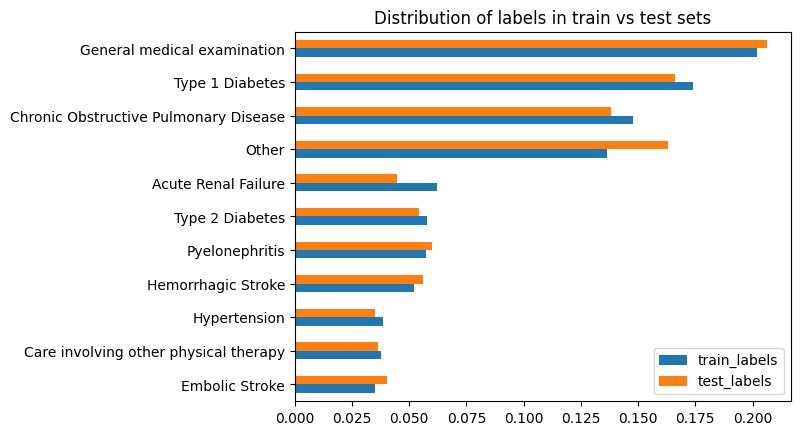

In [25]:
# Plot the distribution of train and test labels
train_labels = y_train.value_counts(normalize=True).sort_values(ascending=True).rename('train_labels')
test_labels = y_test.value_counts(normalize=True).sort_values(ascending=True).rename('test_labels')

# Concatenate the number of examples in the train and test labels
label_counts = pd.concat([train_labels, test_labels], axis=1)

# Plot the number of example in the train and test sets for each label category
label_counts.plot(kind="barh")
plt.title("Distribution of labels in train vs test sets")
plt.show()

# Text Encoding

## Encode labels

The model training process expects the categorical output values to be in numerical format instead of text. This is called encoding of the language and we use an "encoder" for it

In [26]:
from sklearn import preprocessing

# Initialize a LabelEncoder object
le = preprocessing.LabelEncoder()

# The fit() function takes the unique values in a column and encodes each one into a numerical label
le.fit(df_merged['description'])

# The transform() function formats and returns the corresponding numerical label
y_train_transformed = le.transform(y_train)
y_test_transformed = le.transform(y_test)

# For example, let's take a look at the first three output variables and its corresponding label
print(y_train[0:3].values)
print(y_train_transformed[0:3])

['Hypertension' 'Chronic Obstructive Pulmonary Disease'
 'General medical examination']
[6 2 4]


The inverse_transform() function takes in a list of numerical labels and returns the corresponding text label. You might use this later on to show your results in a human interpratable language.

In [27]:
# Check that we can inverse transform the categorical values
list(le.inverse_transform([2, 4, 6]))

['Chronic Obstructive Pulmonary Disease',
 'General medical examination',
 'Hypertension']

# NLP Model

## Tokenize text input

Language models can't parse the entire text. An important aspect of NLP is "Tokenization", in which the input text is split into smaller units of texts.  

State-of-the-art algorithms for NLP are based on the Transformer architecture. GPT, chatGPT, BERT, etc. are all transformer based. 

BERT models are freely available to use and here we will use a finetuned model on biomedical datasets.

In [28]:
# Download and install the transformers package
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 16.2 MB/s eta 0:00:00


In [29]:
# Import transformers package and several pretrained BERT models for comparison
from transformers import AutoTokenizer, BertTokenizer

# Bio_ClinicalBERT
bcbert_tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

# SciBERT
scibert_tokenizer = AutoTokenizer.from_pretrained("allenai/scibert_scivocab_uncased")

# BERT
bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


### Tokenization examples


In [30]:
# In the previous step, we downloaded several different BERT-based models. 
#In this step, we will see how the  tokenize() function in each of these 
#pretrained models can be used to split the text in one of the SOAP notes into smaller units.

# Extract sample text to be used for tokenization
text = df_merged['SOAP_Note_transformed'][0]
print("Text:", wrap(text, 100), "\n")

# Split the text into tokens, with Bio_ClinicalBERT, BERT and SciBERT.
bcbert_tokens = bcbert_tokenizer.tokenize(text)
scibert_tokens = scibert_tokenizer.tokenize(text)
bert_tokens = bert_tokenizer.tokenize(text)

# Pad out the shorter lists to be the same length for display purposes
while len(scibert_tokens) < len(bcbert_tokens):
    scibert_tokens.append("")
while len(bert_tokens) < len(bcbert_tokens):
    bert_tokens.append("")

# Label the columns
print('{:<12} {:<12} {:<12}'.format("BC_BERT", "SciBERT", "BERT"))
print('{:<12} {:<12} {:<12}'.format("-------", "-------", "----"))

# Display the tokens
for tup in zip(bcbert_tokens, scibert_tokens, bert_tokens):
    print('{:<12} {:<12} {:<12}'.format(tup[0], tup[1], tup[2]))

#Overall, the output of all three BERT models are similar, so we will use the standard BERT model for our training process.

Text: s : a 33 year old female crystallographer presents with mild spells of vertigo , mild headaches
particularly at the back of the head and in the morning x 2 weeks . pt also reports chronic mild
occasional lightheadedness . o : height 160 cm , weight 53 . 8 kg , temperature 37 . 3 c , pulse 76
, systolicbp 146 , diastolicbp 93 , respiration 15 , heart = 2 / 6 systolic murmur at base of heart
, chest = clear to auscultation b / l , no rales or wheezing , extremities = no edema or clubbing ,
heart = normal s1 , s2 , rrr a : p : performed e / m level 2 ( established patient ) - completed ,
and prescribed hydrochlorothiazide - 50 mg po qd , and ordered cholesterol . 

BC_BERT      SciBERT      BERT        
-------      -------      ----        
s            s            s           
:            :            :           
a            a            a           
33           33           33          
year         year         year        
old          old          old         
female     

### Encode all text

This function tokenizes and encodes an entire text corpus into the expected input format for a BERT-based model.  

Return: Three arrays consisting of the tokens, masks and segments processed from the text.

In [31]:
# Tokenize and encode text
def bert_encode(texts, tokenizer, max_len=512):
  all_tokens = []
  all_masks = []
  all_segments = []
    
  for text in texts:
    # Tokenize the text
    text = tokenizer.tokenize(text)
            
    # Preprocess the text sequences to denote the start and end of text sequences
    text = text[:max_len-2]
    input_sequence = ["[CLS]"] + text + ["[SEP]"]
    pad_len = max_len - len(input_sequence)
    
    # Convert tokens into numerical sequences
    # Masks are special "hidden" tokens that are used as part of the training process
    # Segments IDs are used to denote separate sentence embeddings
    tokens = tokenizer.convert_tokens_to_ids(input_sequence) + [0] * pad_len
    pad_masks = [1] * len(input_sequence) + [0] * pad_len
    segment_ids = [0] * max_len
    
    # Accumulate the tokens, masks and segments in the text encoding process
    all_tokens.append(tokens)
    all_masks.append(pad_masks)
    all_segments.append(segment_ids)
    
  # Return three arrays consisting of the tokens, masks and segments processed from the text
  # These arrays will be the input to our BERT-based training model
  return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

# Train model

- Define the model structure
- format the input and output values to match what is expected in the BERT model
- train the model to see how well it can predict the diagnosis category from a patient's medical notes.



## Define model structure

The model is a BERT base model + a 2-layer neural net head for the classification task

The output is how likely the input text corresponds to each one of the eleven output classes.

In [32]:
def build_model(bert_layer, max_len=512):
  
  # Define the expected structure of the inputs to the model
  input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
  input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
  segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

  # Define the BERT pretrained model as the base layer
  pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

  # Add a 2-layer neural net to output the likelihood of the input matching each of the output labels
  clf_output = sequence_output[:, 0, :]
  net = tf.keras.layers.Dense(64, activation='relu')(clf_output)
  net = tf.keras.layers.Dropout(0.2)(net)
  net = tf.keras.layers.Dense(32, activation='relu')(net)
  net = tf.keras.layers.Dropout(0.2)(net)
  out = tf.keras.layers.Dense(11, activation='softmax')(net)

  # Return the model structure
  model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)

  # Define hyperparameters to customize and optimize the model training process
  model.compile(tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

  return model

## Process model inputs

Format the input and output values to match the BERT model.

- Encode text to tokens
- Output labels into a categorical matrix format



In [33]:
# The max length is the maximum sequence length to be used for training.
# BERT can handle up to 512 words in a sequence, but due to resource constraints,
# we will restrict the maximum sequence length to 150 words.
max_len = 150

# Encode the input text
train_input = bert_encode(X_train.values, bcbert_tokenizer, max_len=max_len)
test_input = bert_encode(X_test.values, bcbert_tokenizer, max_len=max_len)

# Reformat the output labels
train_labels = tf.keras.utils.to_categorical(y_train_transformed, num_classes=11)
test_labels = tf.keras.utils.to_categorical(y_test_transformed, num_classes=11)

## Build model

- Download the base BERT model
- This model expects three inputs in the InputLayer corresponding to the preprocessed token, mask and segment arrays, followed by a Keras Layer which is the output of the base BERT model.  
This output is then passed into our custom-defined 2-layer neural net with a final output of eleven nodes corresponding to the eleven possible diagnosis categories. 
The value in each of the output nodes represents the model's prediction on how likely the input text matches a specific diagnosis.

In [34]:
import tensorflow_hub as hub

# Download the base BERT model from TensorFlow Hub
module_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2'
bert_layer = hub.KerasLayer(module_url, trainable=True)

# Build and display the model structure
model = build_model(bert_layer, max_len=max_len)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 150)]        0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 150)]        0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 150, 768)]                'input_mask[0][0]',         

## Run model

We will now run the model using the model.fit() method.  Each iteration, or epoch, of the training process will look at all the training examples and adjust the internal weights in the neural network model to reduce the amount of error in the prediction.  We will do ten passes in this training example, but feel free to increase or decrease the number of epochs to see its effect on performance.

To track the improvement in performance, the training process will calculate the accuracy score using a validation set that is automatically generated from 20% of the input data.  

Finally, the training process will compare whether the validation accuracy score has improved from the previous iterations, and if so, the model parameters will be saved.  This is done because a model can potentially be "overtrained", in which case its performance will actually start decreasing, so we want to stop at the point where the model has the best performance and remember those parameters. 

*Note*: This section may take 5-10 minutes to run.

In [34]:
# Train the model using BERT as the pretrained layer
num_epochs = 10
checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

train_history = model.fit(
    train_input, train_labels, 
    validation_split=0.2,
    epochs=num_epochs,
    callbacks=[checkpoint, earlystopping],
    batch_size=32,
    verbose=1)

Epoch 1/10
54/54 [==============================] - ETA: 0s - loss: 2.1178 - accuracy: 0.2686
Epoch 1: val_accuracy improved from -inf to 0.57541, saving model to model.h5
54/54 [==============================] - 120s 1s/step - loss: 2.1178 - accuracy: 0.2686 - val_loss: 1.4837 - val_accuracy: 0.5754
Epoch 2/10
54/54 [==============================] - ETA: 0s - loss: 1.4486 - accuracy: 0.5378
Epoch 2: val_accuracy improved from 0.57541 to 0.74942, saving model to model.h5
54/54 [==============================] - 66s 1s/step - loss: 1.4486 - accuracy: 0.5378 - val_loss: 0.9973 - val_accuracy: 0.7494
Epoch 3/10
54/54 [==============================] - ETA: 0s - loss: 1.1076 - accuracy: 0.6738
Epoch 3: val_accuracy improved from 0.74942 to 0.83295, saving model to model.h5
54/54 [==============================] - 66s 1s/step - loss: 1.1076 - accuracy: 0.6738 - val_loss: 0.7463 - val_accuracy: 0.8329
Epoch 4/10
54/54 [==============================] - ETA: 0s - loss: 0.9092 - accuracy: 0.7

## Graph training progress

Visualize the training process by plotting progressive decrease in loss and increase in accuracy over the number of epochs, for both the training and validation sets.

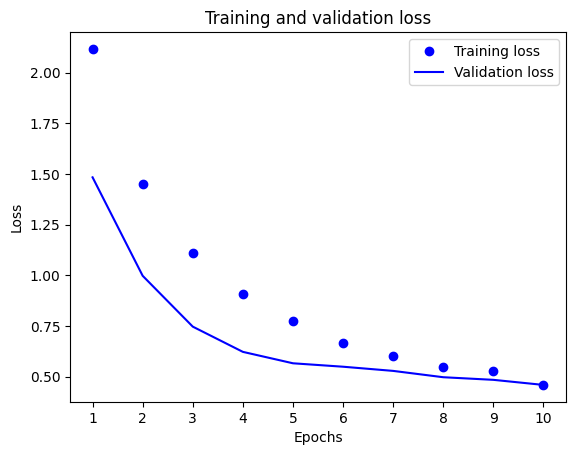

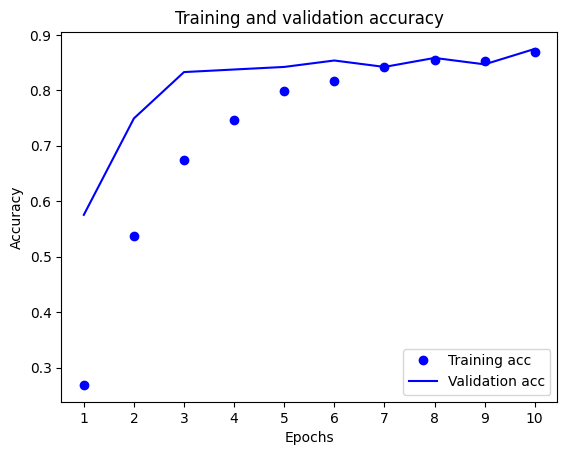

In [35]:
# Define a function to display graphs comparing the train and validation loss and accuracy
def showGraphs(history):

  # Extract the accuracy and loss values from the history object
  history_dict = history.history
  
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Define the number of epochs to be used in the plot
  epochs = range(1, len(acc) + 1)

  # Construct and show the graph comparing the change in loss between 
  # the training and validation sets over epochs
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.xticks(range(1,num_epochs+1,1))
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

  plt.clf()   # clear figure
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']

  # Construct and show the graph comparing the change in accuracy between
  # the training and validation sets over epochs
  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.xticks(range(1,num_epochs+1,1))
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

# Compare train and validation loss and accuracy over epochs
showGraphs(train_history)

# Evaluate model


## Accuracy score on test set

To calculate the model performance on the test set, we will pass the input text examples from the test set into the model and ask it to predict the diagnosis class for each input.  Out of the eleven possible classes, the actual predicted value will be the class that has the highest likelihood based on the predicted values.  This set of predicted values (y_pred) will then be compared to the actual labels in the test set (y_true) to calculate the overall accuracy score.

In [36]:
from sklearn.metrics import accuracy_score

# Load the parameters from the last saved model
model.load_weights('model.h5')

# Make a prediction on each of the inputs in the test set
predictions = model.predict(test_input)

# Define a y_pred array containing the model's "best prediction" for each given input
y_pred = np.argmax(predictions, axis=1)

# Define a y_true array containing the actual labels for each input in the test set
y_true = y_test_transformed

# Calculate accuracy score on the test set by comparing the true vs predicted values
test_acc = accuracy_score(y_true, y_pred)
print(f"Accuracy score on the test set is: {round(test_acc, 3)}")

23/23 [==============================] - 8s 347ms/step
Accuracy score on the test set is: 0.859


## Precision, Recall and F1-score

Performance metrics used for classification models also include Precision, Recall and F1-score.

**Precision**: 
- *How many of what the model predicted as positive are actually positive?*
- Formula for Precision: True Positive / (True Positive + False Positive)

**Recall:** 
- *How many of actual positives are truly predicted by the model?*
- Formula for Recall: True Positive / (True Positive + False Negative)

**F1-score**: 
- *A weighted average of precision and recall scores*
- Formula for F1-score: 2 x (Precision * Recall) / (Precision + Recall)